# Time for a Test Drive!

You've spent some time walking around the Dascar lot, hearing about all the awesome features and specs...

Enough talking. Let's jump into a racecar and see what it can do!

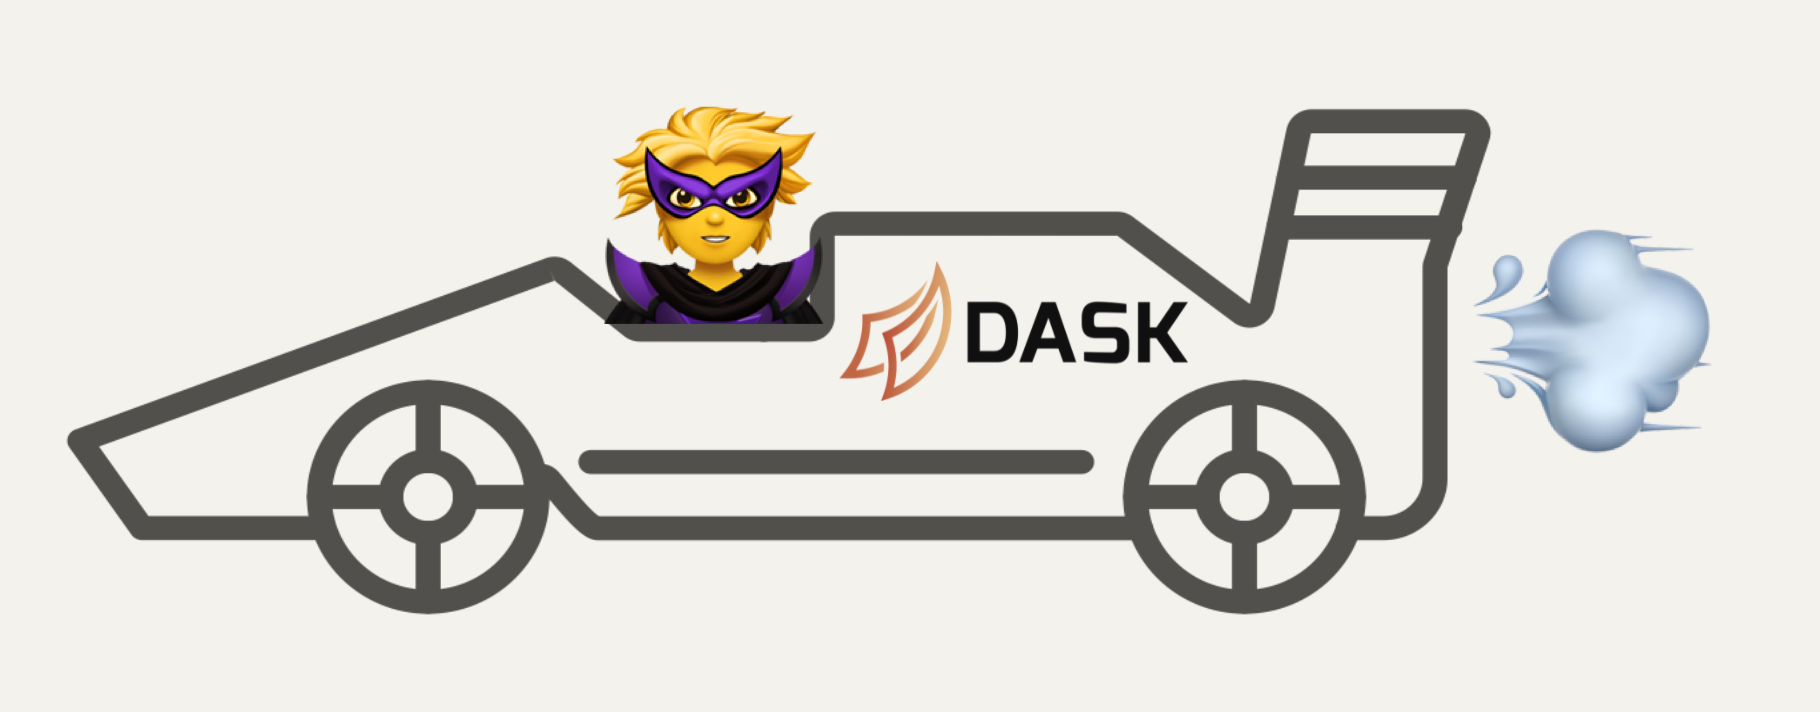

## Dask DataFrames

The pandas car...with **the Dask engine**.

In [1]:
import dask.dataframe as dd

In [2]:
%run ../prep_data.py -d flights

data_dir='/Users/rpelgrim/Documents/git/coiled-resources/dask-tutorial/data'


In [3]:
import os

files = os.path.join('../data', 'nycflights', '*.csv')
files

'../data/nycflights/*.csv'

In [4]:
df = dd.read_csv(files,
                 parse_dates={'Date': [0, 1, 2]},
                 dtype={"TailNum": str,
                        "CRSElapsedTime": float,
                        "Cancelled": bool})

In [5]:
df.head()

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,1990-01-01,1,1621.0,1540,1747.0,1701,US,33,NaN,86.0,...,NaN,46.0,41.0,EWR,PIT,319.0,NaN,NaN,False,0
1,1990-01-02,2,1547.0,1540,1700.0,1701,US,33,NaN,73.0,...,NaN,-1.0,7.0,EWR,PIT,319.0,NaN,NaN,False,0
2,1990-01-03,3,1546.0,1540,1710.0,1701,US,33,NaN,84.0,...,NaN,9.0,6.0,EWR,PIT,319.0,NaN,NaN,False,0
3,1990-01-04,4,1542.0,1540,1710.0,1701,US,33,NaN,88.0,...,NaN,9.0,2.0,EWR,PIT,319.0,NaN,NaN,False,0
4,1990-01-05,5,1549.0,1540,1706.0,1701,US,33,NaN,77.0,...,NaN,5.0,9.0,EWR,PIT,319.0,NaN,NaN,False,0


In [6]:
%%time
df.groupby("Origin")["DepDelay"].mean().compute()

CPU times: user 3.22 s, sys: 624 ms, total: 3.85 s
Wall time: 1.8 s


Origin
EWR    10.295469
JFK    10.351299
LGA     7.431142
Name: DepDelay, dtype: float64

In [7]:
df

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
npartitions=10,,,,,,,,,,,,,,,,,,,,,
,datetime64[ns],int64,float64,int64,float64,int64,object,int64,object,float64,float64,float64,float64,float64,object,object,float64,float64,float64,bool,int64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


## Dask Arrays

The Numpy car...with **Dask engine superpowers**.

In [8]:
import dask.array as da

In [9]:
array = da.random.random((10000, 10000), chunks=(1000, 1000))

In [10]:
array

dask.array<random_sample, shape=(10000, 10000), dtype=float64, chunksize=(1000, 1000), chunktype=numpy.ndarray>

In [11]:
array[:10,:5]

dask.array<getitem, shape=(10, 5), dtype=float64, chunksize=(10, 5), chunktype=numpy.ndarray>

In [12]:
array[:10,:5].compute()

array([[0.1665484 , 0.285567  , 0.17730872, 0.50288572, 0.70595871],
       [0.46781303, 0.68796135, 0.18895974, 0.99015546, 0.05895134],
       [0.30630754, 0.13843371, 0.10643817, 0.38109157, 0.47304128],
       [0.26194517, 0.9949585 , 0.61355488, 0.84009467, 0.35724134],
       [0.50721781, 0.4908752 , 0.50593046, 0.63355647, 0.093274  ],
       [0.42986474, 0.76284093, 0.31305433, 0.56251379, 0.87490514],
       [0.52623063, 0.77315689, 0.5303424 , 0.20632501, 0.42653747],
       [0.92204071, 0.99090876, 0.01478522, 0.19406178, 0.51554915],
       [0.74062618, 0.16626196, 0.07590212, 0.88968462, 0.84108242],
       [0.31822034, 0.77056605, 0.4954031 , 0.49313619, 0.30642598]])

In [13]:
%%time
array.sum(axis=1).compute()

CPU times: user 598 ms, sys: 120 ms, total: 718 ms
Wall time: 164 ms


array([4962.13530221, 4941.72975195, 5001.90035958, ..., 5014.25687284,
       5019.53504287, 5049.6295373 ])

## Dask ML

The scikit-learn car with.... you guessed it -- **Dask rocketfuel**.

In [14]:
from dask_ml.linear_model import LogisticRegression
from dask_ml.datasets import make_classification

In [27]:
X, y = make_classification(n_samples=1_000, chunks=50)

In [28]:
X

dask.array<normal, shape=(1000, 20), dtype=float64, chunksize=(50, 20), chunktype=numpy.ndarray>

In [29]:
y

dask.array<astype, shape=(1000,), dtype=int64, chunksize=(50,), chunktype=numpy.ndarray>

In [30]:
lr = LogisticRegression()

In [31]:
%%time
lr.fit(X, y)

CPU times: user 2.6 s, sys: 631 ms, total: 3.24 s
Wall time: 2.7 s


LogisticRegression()

In [32]:
%%time
predictions = lr.predict(X).compute()

CPU times: user 12.6 ms, sys: 1.68 ms, total: 14.2 ms
Wall time: 12.7 ms


In [33]:
lr.score(X,y).compute()

0.676

# For the Mechanics in the Room

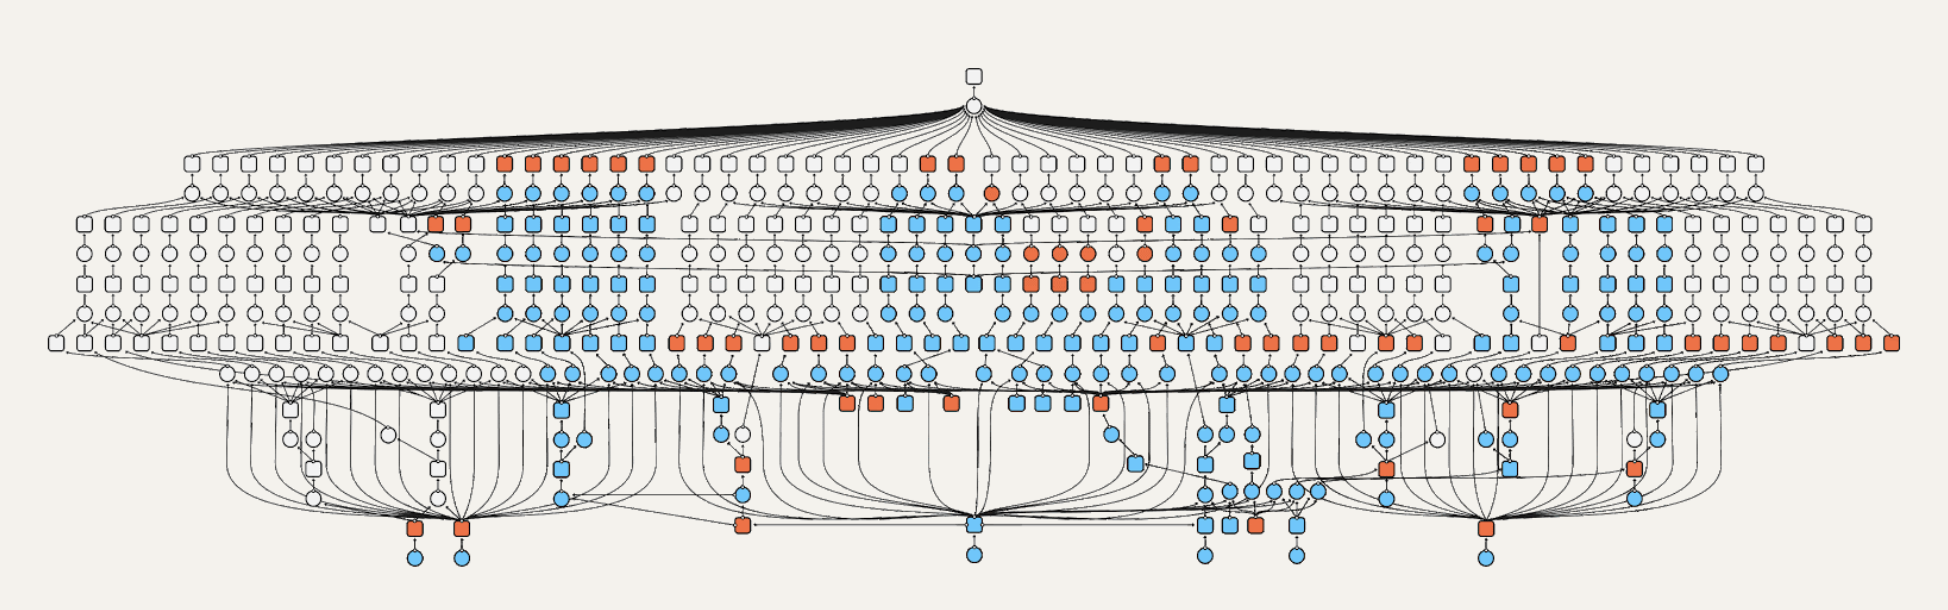

## Custom Dask
Dask is actually best understood as two projects: 
1. a high-level project that offers easily-accessible APIs like Dask DataFrames and Dask Arrays.
2. a **low-level project** that allows you to parallelize custom Python code with `delayed` and `futures`

In [34]:
from time import sleep

def inc(x):
    """Increments x by one"""
    sleep(1)
    return x + 1

def add(x=0, y=0, z=0):
    """Adds x and y and z"""
    sleep(1)
    return x + y + z

In [35]:
%%time

x = inc(1)
y = inc(2)
z = add(x, y)

CPU times: user 1.5 ms, sys: 2.4 ms, total: 3.9 ms
Wall time: 3.01 s


In [36]:
z

5

In [37]:
from dask import delayed

In [38]:
%%time

a = delayed(inc)(1)
b = delayed(inc)(2)
c = delayed(add)(a, b)

CPU times: user 704 µs, sys: 121 µs, total: 825 µs
Wall time: 807 µs


In [39]:
c

Delayed('add-49d055cf-2305-4f93-a8be-272616a43925')

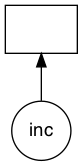

In [40]:
a.visualize()

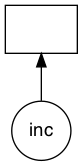

In [41]:
b.visualize()

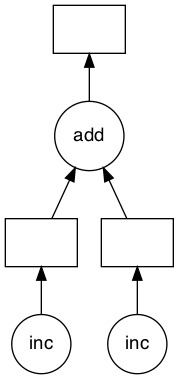

In [42]:
c.visualize()

In [43]:
d = delayed(inc)(3)

In [44]:
c = delayed(add)(a, b, d)

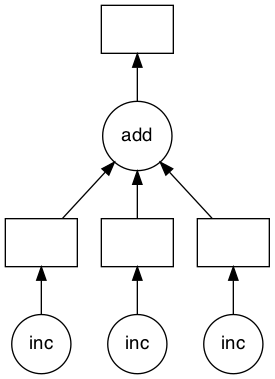

In [45]:
c.visualize()

In [46]:
%%time
c.compute()

CPU times: user 3.9 ms, sys: 3.95 ms, total: 7.85 ms
Wall time: 2.01 s


9

# Deploying Dask on a Cloud Cluster (with Coiled)

In [1]:
import coiled

In [10]:
coiled.create_software_environment(
    name="dask-mini-tutorial",
    conda="/Users/rpelgrim/Documents/git/coiled-resources/dask-tutorial/binder/environment.yml",
)

Creating new software environment
Creating new ecr build
STEP 1: FROM coiled/default:sha-6b4e896
STEP 2: COPY environment.yml environment.yml
--> da1f369d48f
STEP 3: RUN conda env update -n coiled -f environment.yml     && rm environment.yml     && conda clean --all -y     && echo "conda activate coiled" >> ~/.bashrc
Solving environment: ...working... done

python_abi-3.9       | 4 KB      | ########## | 100% 
s3transfer-0.5.0     | 55 KB     | ########## | 100% 
pysocks-1.7.1        | 28 KB     | ########## | 100% 
typed-ast-1.5.2      | 811 KB    | ########## | 100% 
importlib-metadata-4 | 33 KB     | ########## | 100% 
nbclassic-0.3.5      | 22 KB     | ########## | 100% 
libblas-3.9.0        | 12 KB     | ########## | 100% 
backcall-0.2.0       | 13 KB     | ########## | 100% 
asttokens-2.0.5      | 21 KB     | ########## | 100% 
psutil-5.9.0         | 398 KB    | ########## | 100% 
tornado-6.1          | 646 KB    | ########## | 100% 
pathspec-0.9.0       | 31 KB     | ########## 

distributed.client - ERROR - Failed to reconnect to scheduler after 30.00 seconds, closing client
_GatheringFuture exception was never retrieved
future: <_GatheringFuture finished exception=CancelledError()>
asyncio.exceptions.CancelledError


--> 9b7608b80f2
STEP 4: ENV PATH /opt/conda/envs/coiled/bin:$PATH
--> c1f04c20218
STEP 6: COMMIT f77b91e6-3c74-469a-887b-cd475d33e192
STEP 5: SHELL ["conda", "run", "-n", "coiled", "/bin/bash", "-c"]
--> 0168a85ca56
latest version: 4.11.0
0168a85ca56b19a4e8f3c14c8f9cecca6b75bca1c78fc365ced96dc5555a40c6

==> WARNING: A newer version of conda exists. <==
current version: 4.9.2



Please update conda by running
$ conda update -n base -c defaults conda


Docker build succeeded: f77b91e6-3c74-469a-887b-cd475d33e192


distributed.deploy.cluster - WARNING - Failed to sync cluster info multiple times - perhaps there's a connection issue? Error:
Traceback (most recent call last):
  File "/Users/rpelgrim/mambaforge/envs/dask-mini-tutorial/lib/python3.9/site-packages/distributed/comm/tcp.py", line 398, in connect
    stream = await self.client.connect(
  File "/Users/rpelgrim/mambaforge/envs/dask-mini-tutorial/lib/python3.9/site-packages/tornado/tcpclient.py", line 275, in connect
    af, addr, stream = await connector.start(connect_timeout=timeout)
asyncio.exceptions.CancelledError

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/rpelgrim/mambaforge/envs/dask-mini-tutorial/lib/python3.9/asyncio/tasks.py", line 492, in wait_for
    fut.result()
asyncio.exceptions.CancelledError

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/Users/rpelgrim/mambaforge/envs/dask-mini-tut

Copying config sha256:0168a85ca56b19a4e8f3c14c8f9cecca6b75bca1c78fc365ced96dc5555a40c6
Getting image source signatures
Copying blob sha256:085b9b337bfdd247349f8aaff835bb0dc3cc749814a6813ce55b51713f19000c
Copying blob sha256:a04d270555b5368c0a961bd3f42b0d63ef844a4a0a413099893a0009f41d1d72
Copying blob sha256:dfef8986f350d2efb7dd633410dceac30543be620085d9819f42db7067f55f64
Copying blob sha256:f5600c6330da7bb112776ba067a32a9c20842d6ecc8ee3289f1a713b644092f8
Copying blob sha256:95586cf65be51397fa66deda7dc39e71cde778b158d00667af113db52029d2bb
Copying blob sha256:0553ab4c463e8dd22931a5deb37e8014a18cde60d6be1337f4415de56649a947
Writing manifest to image destination
Storing signatures
Copying blob sha256:085b9b337bfdd247349f8aaff835bb0dc3cc749814a6813ce55b51713f19000c
Getting image source signatures
Copying blob sha256:dfef8986f350d2efb7dd633410dceac30543be620085d9819f42db7067f55f64
Copying blob sha256:0553ab4c463e8dd22931a5deb37e8014a18cde60d6be1337f4415de56649a947
Copying blob sha256:f5600c6

In [2]:
cluster = coiled.Cluster(
    name="dask-mini-tutorial", 
    n_workers=20, 
    worker_memory='25Gib',
    software="rrpelgrim/dask-mini-tutorial",
    scheduler_options={'idle_timeout':'3 hours'},
    shutdown_on_close=False,
)

Output()

Using existing cluster: 'dask-mini-tutorial'

In [3]:
from distributed import Client

client = Client(cluster)
client

/Users/rpelgrim/mambaforge/envs/dask-mini-tutorial/lib/python3.9/site-packages/distributed/client.py:1128: VersionMismatchWarning: Mismatched versions found

+-------------+---------------+---------------+---------------+
| Package     | client        | scheduler     | workers       |
+-------------+---------------+---------------+---------------+
| dask        | 2021.11.1     | 2021.11.2     | 2021.11.2     |
| distributed | 2021.11.1     | 2021.11.2     | 2021.11.2     |
| numpy       | 1.21.5        | 1.21.4        | 1.21.4        |
| pandas      | 1.4.0         | 1.3.4         | 1.3.4         |
| python      | 3.9.6.final.0 | 3.9.7.final.0 | 3.9.7.final.0 |
+-------------+---------------+---------------+---------------+
  warnings.warn(version_module.VersionMismatchWarning(msg[0]["warning"]))


<Client: 'tls://10.4.13.149:8786' processes=20 threads=160, memory=620.19 GiB>

In [4]:
import dask.dataframe as dd

### Load a Large Dataset
Let's read in a dataset of ~15GB which would be too big to read in with pandas on my 16GB RAM machine.

In [8]:
df = dd.read_csv(
    "s3://nyc-tlc/trip data/yellow_tripdata_2019-*.csv",
    parse_dates=["tpep_pickup_datetime", "tpep_dropoff_datetime"],
    dtype={
        "payment_type": "UInt8",
        "VendorID": "UInt8",
        "passenger_count": "UInt8",
        "RatecodeID": "UInt8",
        "store_and_fwd_flag": "category",
        "PULocationID": "UInt16",
        "DOLocationID": "UInt16",
    },
    storage_options={"anon": True},
    blocksize="16 MiB",
)

In [9]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
npartitions=471,,,,,,,,,,,,,,,,,,
,UInt8,datetime64[ns],datetime64[ns],UInt8,float64,UInt8,category[unknown],UInt16,UInt16,UInt8,float64,float64,float64,float64,float64,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [7]:
%%time
df.groupby("passenger_count").tip_amount.mean().compute()

KilledWorker: ("('read-csv-6b9991f69cc65c04d94da37b8ed74489', 239)", <WorkerState 'tls://10.4.6.58:40501', name: coiled-dask-rrpelgr71-100723-worker-044aa9c101, status: closed, memory: 0, processing: 43>)